In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('Income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

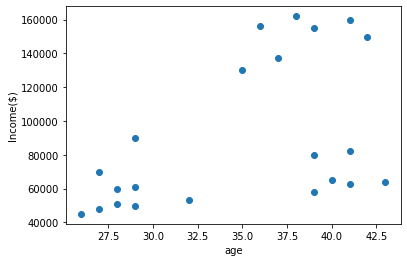

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('age')
plt.ylabel('Income($)')

In [5]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['clusters']=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


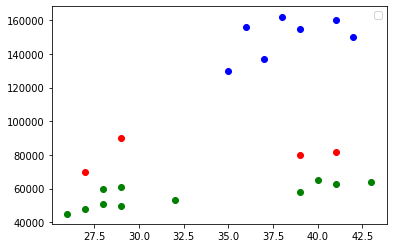

In [11]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')

plt.legend()

In [16]:
from  sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)']=scalar.transform(df[['Income($)']])


scalar.fit(df[['Age']])
df['Age']=scalar.transform(df[['Age']])

df


,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [18]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [19]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [20]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [22]:
df=df.drop(['Name','clusters'],axis='columns')
df

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [25]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

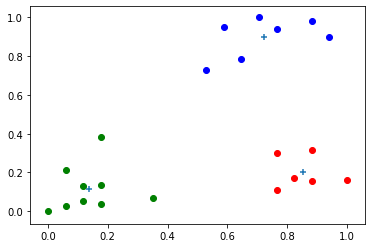

In [26]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+')

In [27]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters= k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [28]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.21878010893330443,
 0.1746238658668789,
 0.13976844995388157,
 0.10663983840905435,
 0.08272341876466036]

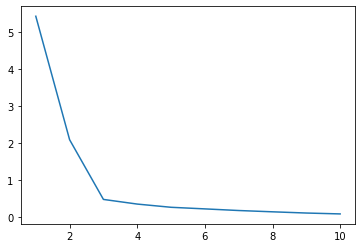

In [29]:
plt.plot(k_range,sse)